In [1]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [2]:
cities = pd.read_csv('data/Top50/top50cities.csv',delimiter=',')

In [3]:
#import nodes to get id from nodes/hosts
hosts = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    for p in range(1,14):
        if (os.path.exists('data/Top50/hosts/'+city['name']+str(p)+'.csv')):
            df = pd.read_csv('data/Top50/hosts/'+city['name']+str(p)+'.csv',index_col=False,dtype={'id': np.int64})
            hosts = pd.concat([hosts,df]).reset_index(drop=True)
print(len(hosts))
hosts=hosts.drop_duplicates()
print(len(hosts))


10586
10582


In [4]:
hosts['lat']='NaN'
hosts['lng']='NaN'
#rev['city']='NaN'
hosts['country']='NaN'
for idx,city in cities.iterrows():
    l = hosts.loc[hosts.city==city['name']].index.tolist()
    for i in l:
        hosts.set_value(i,'lat',city['lat'])
        hosts.set_value(i,'lng',city['lng'])
        hosts.set_value(i,'city',city['name'].lower())
        hosts.set_value(i,'country',city['countryCode'].lower())
len(hosts.values)

/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/Users/Eike/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()


10582

In [5]:
rev= pd.read_csv('data/reviews_total_geo_2.csv',dtype={'id':np.int64})


/Users/Eike/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
rev

,id,text,createdDate,experience,relationshipType,isPostTrip,to,from,fromPublicName,fromPublicAddressId,...,fromStatus,fromIsVerified,fromIsDeleted,fromBlockedBy,inverseReference,response,lat,lng,city,country
0,27077307,Amazing chef and humble human being. Willing t...,2018-10-17T22:09:22Z,positive,host,True,2009059021,2001999679,Dhanush Anand,109610804.0,...,yes,True,False,NaN,NaN,NaN,3.695000,96.868000,setiabudi,id
1,27152728,Amazing boy with amazing family . He met me up...,2018-10-28T19:16:31Z,positive,surf,True,2009059021,2007724821,Bakhar Sardzhaeva,271153483.0,...,no,False,False,NaN,NaN,NaN,25.258172,55.304717,dubai,ae
2,26922175,￼\n\n \n\nWe use cookies to enhance your exper...,2018-09-27T14:41:06Z,positive,surf,True,2008295707,2008797517,Sun-hyung Kim,312790604.0,...,maybe,False,False,NaN,NaN,NaN,37.598500,126.978300,seoul,kr
3,26866500,"I was ill, when I come to Alexey's place, so I...",2018-09-20T17:32:11Z,positive,surf,True,2008295707,2003041472,Michelle Kuglerová,123277124.0,...,maybe,False,False,NaN,NaN,NaN,49.400000,15.583333,jihlava,cz
4,26818885,Didn't end up staying at his house because of....,2018-09-15T05:17:31Z,positive,surf,True,2008295707,4294146,Yvette Shaw,6999267.0,...,no,False,False,NaN,NaN,NaN,-35.283333,174.083333,paihia,nz
5,26779351,С Алексеем было очень приятно и комфортно пров...,2018-09-10T12:56:37Z,positive,surf,True,2008295707,2008843836,Angelika Krasnozhonova,314663738.0,...,hang,True,False,NaN,NaN,NaN,58.596650,49.660070,"kirov,",ru
6,26176442,I had a great experience in Russia with Alexei...,2018-07-10T13:57:26Z,positive,surf,True,2008295707,2007359140,Diego Gabriel Cortez Fernandez,250795609.0,...,no,False,False,NaN,NaN,NaN,30.293650,120.161419,hangzhou,cn
7,26164016,I bet Alexey is definitely a good person. He l...,2018-07-09T09:52:29Z,positive,surf,True,2008295707,2007634207,Heejeong Yang,265596282.0,...,no,False,False,NaN,NaN,NaN,37.598500,126.978300,seoul,kr
8,26148751,My experience with Alexey was awesome. He is ...,2018-07-07T16:05:53Z,positive,surf,True,2008295707,2005150941,Siboney Godoy,176314139.0,...,hang,False,False,NaN,NaN,NaN,39.290380,-76.612190,"baltimore,",us
9,26119628,Alexey is a really amazing host!! At the first...,2018-07-04T09:15:01Z,positive,surf,True,2008295707,1003812034,Emma Jimenez,10585071.0,...,maybe,False,False,NaN,NaN,NaN,8.516569,-76.077564,pereira,co


In [7]:
#drop entries that couldn't be found in the preprocessing part
print(len(rev))
rev=rev[pd.to_numeric(rev['lat'], errors='coerce').notnull()]
rev=rev[pd.to_numeric(rev['lng'], errors='coerce').notnull()]
rev=rev[pd.to_numeric(rev['to'], errors='coerce').notnull()]
rev=rev[pd.to_numeric(rev['from'], errors='coerce').notnull()]
rev['to']=rev['to'].astype('int64')
rev['from']=rev['from'].astype('int64')


96085


In [8]:
G = nx.MultiDiGraph()
#Add hosts to the network
G.add_nodes_from([(rows['id'],{'city':rows['city'],'lat':rows['lat'],'lng':rows['lng']}) for idx,rows in hosts.iterrows()])
#Add users to the network from the source reviews/surfers and hosts
G.add_nodes_from([(rows['from'],{'city':rows['city'],'lat':rows['lat'],'lng':rows['lng']}) for idx,rows in rev.iterrows()])
G.number_of_nodes()


91561

In [9]:
G.remove_edges_from(list(G.edges()))
for idx,r in rev.iterrows():
    if r['from'] in G and r['to'] in G:
        if r['relationshipType']=='surf':
            G.add_edge(int(r['from']),r['to'])
        if r['relationshipType']=='host':
            G.add_edge(int(r['to']),int(r['from']))
    else:
        print('...'+str(r['from'])+'...'+str(r['to'])+'...')


...2006181888...2004879441...
...2002062416...2004879441...
...1000562293...2004879441...
...1000211129...2004879441...
...2000614312...2004879441...
...2000796253...2006303896...
...4734890...1003944200...
...2007117438...2007799772...
...1854819...2007799772...
...2008087820...2007799772...
...2003289984...2007799772...
...4434422...2007799772...
...2000252744...681757...
...2000252744...681757...
...642402...681757...
...1064335...681757...
...604115...681757...
...2641774...319013...
...382443...319013...
...1005147832...319013...
...1625257...319013...
...388196...319013...
...2579794...319013...
...1464516...319013...
...2004670...319013...
...3065585...319013...
...2619229...319013...
...3011382...319013...
...2339906...319013...
...1006113853...2004136667...
...1440481...2660323...
...1374135...2660323...
...4095666...2660323...
...2699442...2660323...
...412346...2660323...
...2117149...2660323...
...1509792...2660323...
...1994318...2660323...
...2816747...2660323...
...26125

In [10]:
#pos = {x[0]:(x[1]['lat'], x[1]['lng']) for x in list(G.nodes(data=True))}
#pos
print('number of nodes: ',G.number_of_nodes())
print('number of edges: ',G.number_of_edges())
nx.info(G)

number of nodes:  91561
number of edges:  95128


'Name: \nType: MultiDiGraph\nNumber of nodes: 91561\nNumber of edges: 95128\nAverage in degree:   1.0390\nAverage out degree:   1.0390'

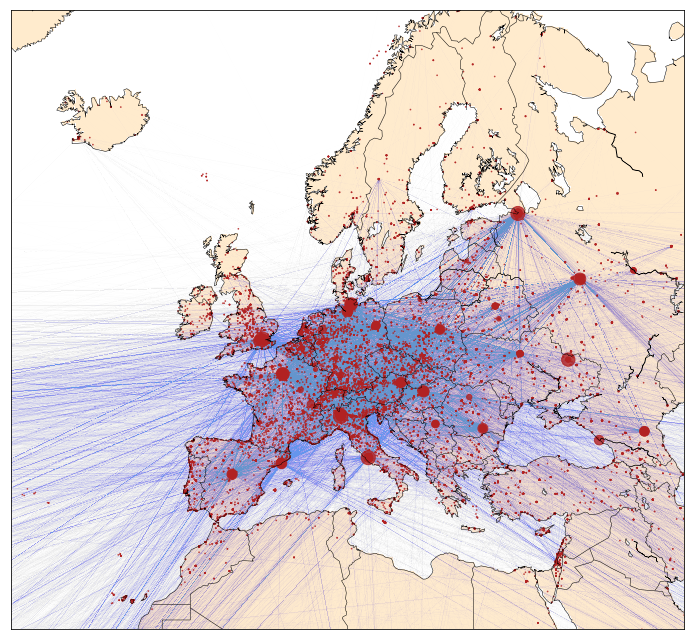

In [11]:
plt.figure(figsize = (10,9))
m = Basemap(projection='merc',llcrnrlon=-30,llcrnrlat=25,urcrnrlon=50,
urcrnrlat=70, lat_ts=0, resolution='l',suppress_ticks=True)
#mx, my = m(cities['lng'].values, cities['lat'].values)
mx,my = m(list(nx.get_node_attributes(G,'lng').values()),list(nx.get_node_attributes(G,'lat').values()))
pos = {}
for count, elem in enumerate(list(G.nodes())):
     pos[elem] = (mx[count], my[count])
m.drawlsmask(land_color='blanchedalmond', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, grid=5)
nx.draw_networkx_nodes(G, pos = pos, node_list =G.nodes() ,node_color = 'firebrick', alpha = 0.8, node_size = [v[1] * 0.5 for v in G.degree()])
nx.draw_networkx_edges(G, pos = pos, edge_color='cornflowerblue', alpha=0.2,width=0.01, arrows = False)
#nx.draw_networkx_edges(G, pos = pos, edge_color='g', alpha=0.2, arrows = False)
m.drawcountries(linewidth = 0.5)
#m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=0.5)
#m.bluemarble()
plt.tight_layout()
plt.savefig("europe_user.png", format = "png", dpi = 300)

plt.show()

In [14]:
#Geocluster
#geodistance function for clustering
from math import sin, cos, sqrt, atan2, radians
def geoDist(loc1,loc2):
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(loc1[0])
    lon1 = radians(loc1[1])
    lat2 = radians(loc2[0])
    lon2 = radians(loc2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [15]:
from sklearn.cluster import DBSCAN
def geoCluster(X):
    clustering = DBSCAN(eps=10, min_samples=2,metric=geoDist).fit(X)
    return clustering.labels_


In [28]:
import pandas as pd
import numpy as np
X = nx.MultiDiGraph()


In [29]:
nodes = G.nodes(data=True)
data={}
data['id']=[x[0] for x in nodes]
data['city'] = [x[1]['city'] for x in nodes]
data['lat'] = [x[1]['lat'] for x in nodes]
data['lng'] = [x[1]['lng'] for x in nodes]
data['cluster']=geoCluster(np.array([(x[1]['lat'],x[1]['lng'])for x in nodes]))
user = pd.DataFrame(data)

In [ ]:
grouped = user.groupby('cluster')

In [ ]:
X.add_nodes_from([(name,{'city':group.mode()['city'].values[0],'lat':group.mode()['lat'].values[0],'lng':group.mode()['lng'].values[0]}) for name, group in grouped])
X.add_edges_from([(user.loc[user.id==fr]['cluster'].values[0],user.loc[user.id==to]['cluster'].values[0]) for fr,to in  list(G.in_edges())])



In [ ]:
def plotCityDegDistrib(deg,title):
    #fig = plt.bar(range(len(deg)-1),deg,figsize=(20,9))
    labels=[user.loc[user.cluster==key]['city'].mode().values[0].title() for key,val in deg]
    ys=[val for key,val in deg]
    xs = np.arange(len(labels)) 
    width = 0.8

    fig = plt.figure(figsize=(13,5))                                                               
    ax = fig.gca()  #get current axes
    p=ax.bar(xs, ys, width, align='center')

    #Remove the default x-axis tick numbers and  
    #use tick numbers of your own choosing:
    ax.set_xticks(xs)
    #Replace the tick numbers with strings:
    ax.set_xticklabels(labels,rotation='vertical')
    ax.set_title(title)
    ax.set_facecolor('#ffffff')

    plt.tight_layout()
    plt.savefig("data/results/results_geo/"+title+"_distribution.png", format = "png", dpi = 300, transparent=True)



In [ ]:
def plotEuropeDegree(deg,title):
    fig =plt.figure(figsize = (10,9))
    ax = fig.gca()
    m = Basemap(projection='merc',llcrnrlon=-30,llcrnrlat=25,urcrnrlon=50,
    urcrnrlat=70, lat_ts=0, resolution='l',suppress_ticks=True)
    #mx, my = m(cities['lng'].values, cities['lat'].values)
    mx,my = m(list(nx.get_node_attributes(X,'lng').values()),list(nx.get_node_attributes(X,'lat').values()))
    pos = {}
    for count, elem in enumerate(list(X.nodes())):
         pos[elem] = (mx[count], my[count])
    m.drawlsmask(land_color='blanchedalmond', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, grid=5)
    nx.draw_networkx_nodes(X, pos = pos, node_list =G.nodes() ,node_color = 'firebrick', alpha = 0.8, node_size = [v[1] * 0.08 for v in deg])
    nx.draw_networkx_edges(X, pos = pos, edge_color='cornflowerblue', alpha=0.2,width=0.01, arrows = False)
    #nx.draw_networkx_edges(G, pos = pos, edge_color='g', alpha=0.2, arrows = False)
    m.drawcountries(linewidth = 0.5)
    #m.drawstates(linewidth = 0.2)
    m.drawcoastlines(linewidth=0.5)
    #m.bluemarble()
    ax.set_facecolor('#ffffff')
    plt.tight_layout()
    plt.savefig("data/results/results_geo/"+title+"_map.png", format = "png", dpi = 300, transparent=True)

    plt.show()

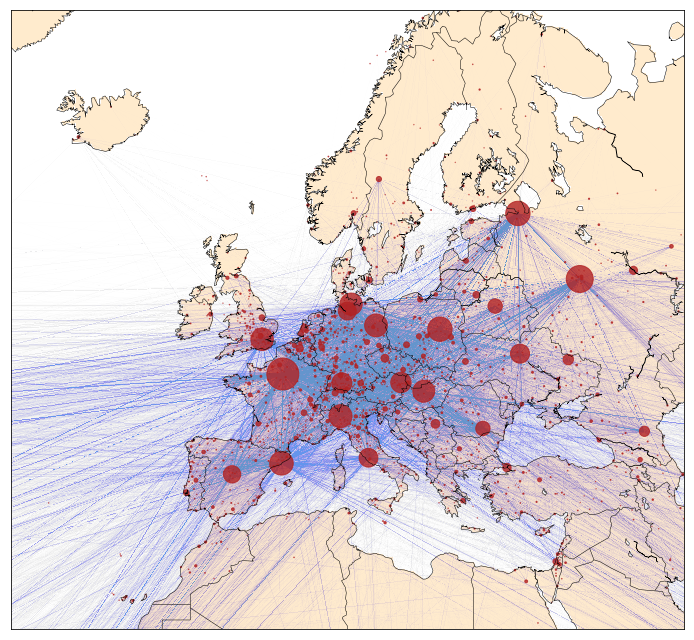

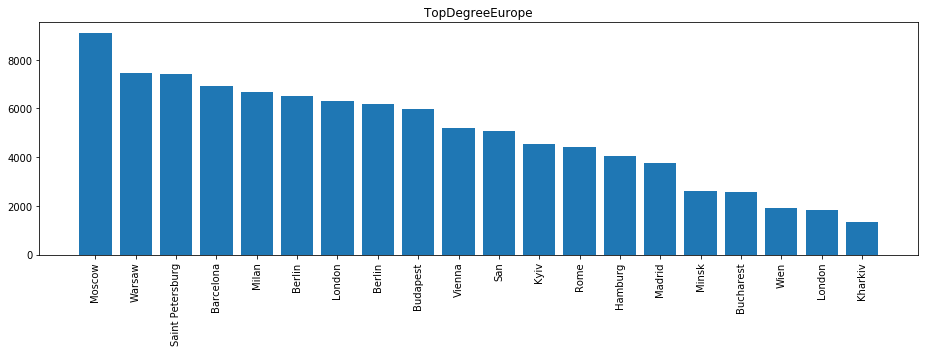

In [79]:
deg=sorted(X.degree(), key=lambda x: x[1], reverse=True)[1:21]

plotEuropeDegree(X.degree(),'TopDegreeEurop')
plotCityDegDistrib(deg,'TopDegreeEurope')

### Which is the most visited City based on the number of visits?

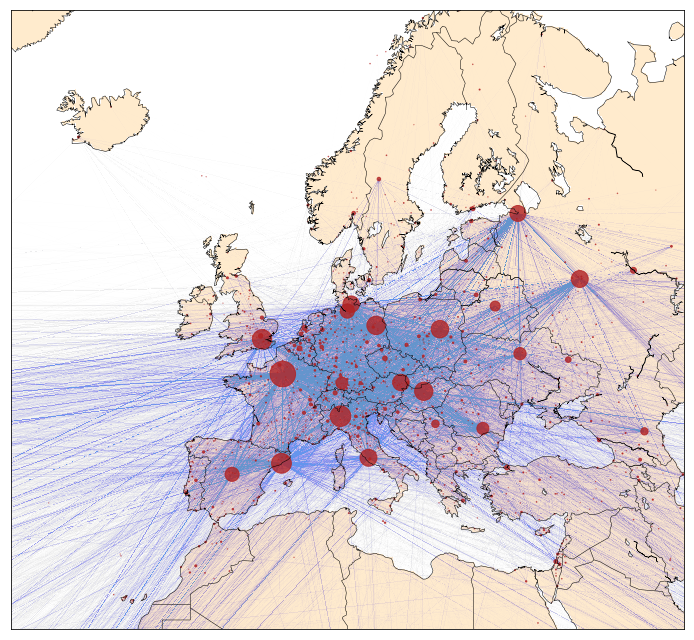

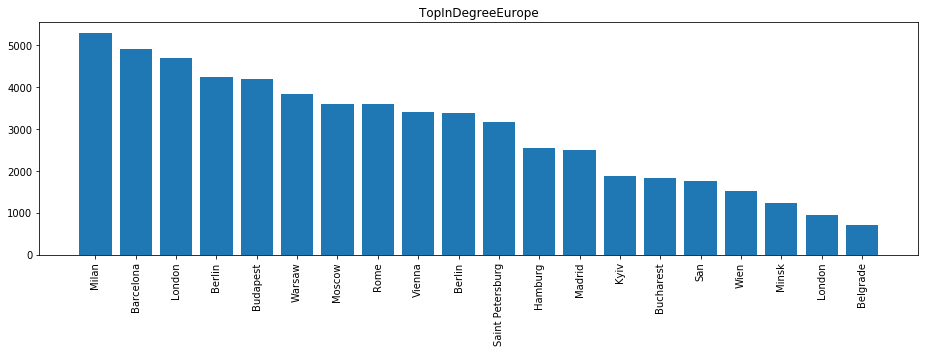

In [80]:
deg=sorted(X.in_degree(), key=lambda x: x[1], reverse=True)[1:21]

plotEuropeDegree(X.in_degree(),'TopInDegreeEurop')
plotCityDegDistrib(deg,'TopInDegreeEurope')

### Which is the most surfing City based on the number of "surfs"?

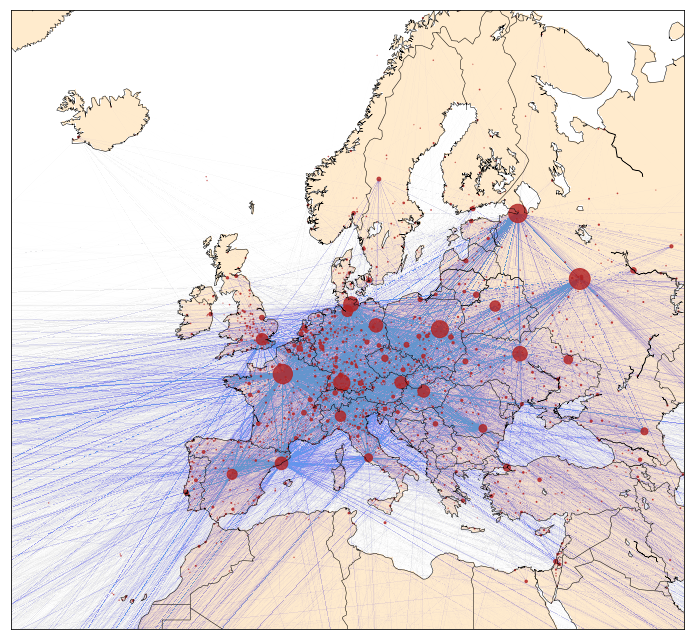

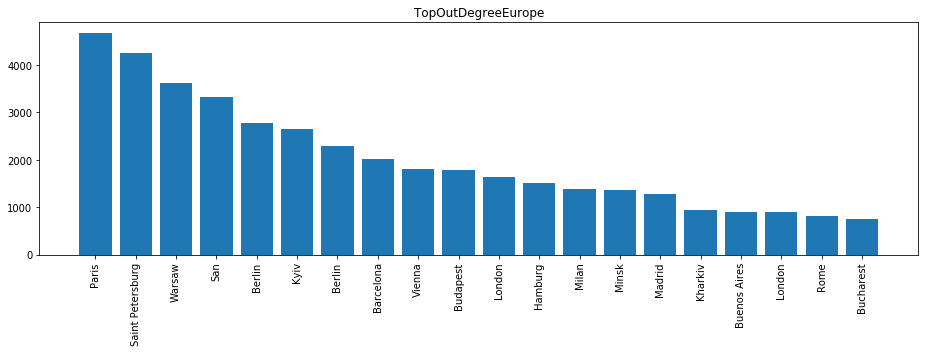

In [82]:
deg=sorted(X.out_degree(), key=lambda x: x[1], reverse=True)[1:21]

plotEuropeDegree(X.out_degree(),'TopOutDegreeEurop')
plotCityDegDistrib(deg,'TopOutDegreeEurope')

In [ ]:
cities = user.groupby('cluster')
cities_in_europe = cities.size().sort_values(ascending=False)[1:40]
#for key, val in cities_in_europe.iteritems():
#    print(key)
labels=[user.loc[user.cluster==key]['city'].mode().values[0].title() for key,val in cities_in_europe.iteritems()]
#labels

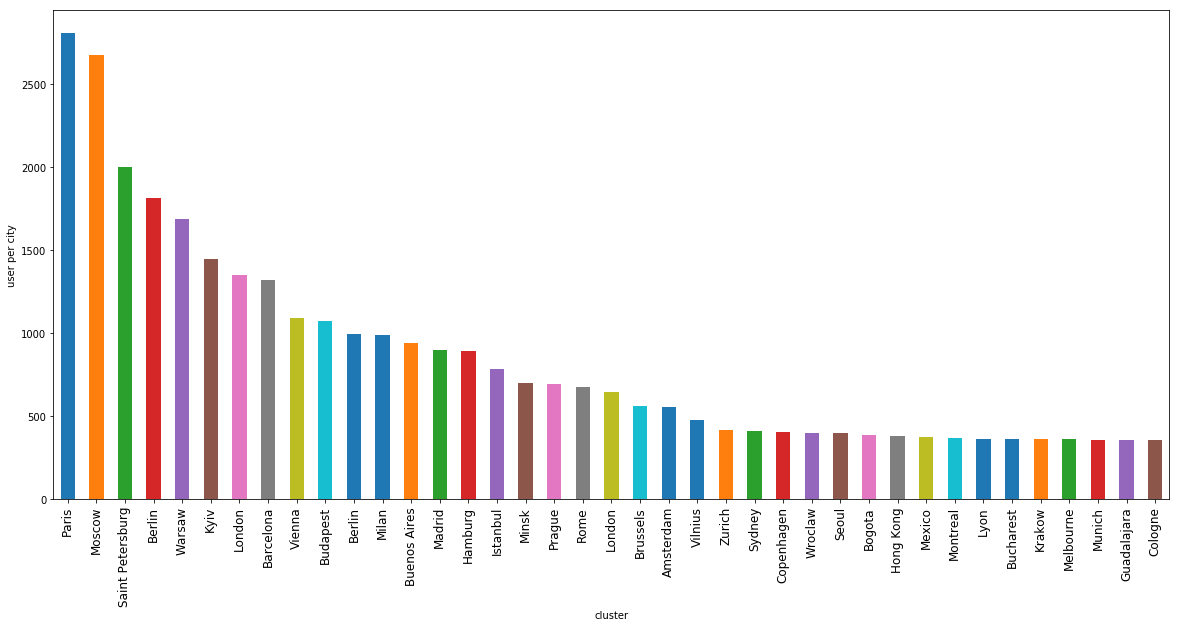

In [75]:
fig = cities_in_europe.plot('bar',figsize=(20,9))
fig.set_xticklabels(labels)
fig.get_xaxis
fig.set_ylabel('user per city')
plt.setp(fig.get_xticklabels(), fontsize=12, rotation='vertical')
plt.savefig('data/results/results_geo/city_dist.png', format = "png", dpi = 300)
plt.show()

Where are the people from the most traveling cities going to?

In [20]:
def plotTravelCityDegDistrib(deg,title):
    #fig = plt.bar(range(len(deg)-1),deg,figsize=(20,9))
    labels=[user.loc[user.cluster==key]['city'].mode().values[0].title() for key,val in deg]
    ys=[val for key,val in deg]
    xs = np.arange(len(labels)) 
    width = 0.8

    fig = plt.figure(figsize=(13,5))                                                               
    ax = fig.gca()  #get current axes
    p=ax.bar(xs, ys, width, align='center')

    #Remove the default x-axis tick numbers and  
    #use tick numbers of your own choosing:
    ax.set_xticks(xs)
    #Replace the tick numbers with strings:
    ax.set_xticklabels(labels,rotation='vertical')
    ax.set_title(title)
    ax.set_facecolor('#ffffff')

    plt.tight_layout()
    #plt.savefig("data/results/results_geo/"+title+"_distribution.png", format = "png", dpi = 300, transparent=True)




In [21]:
def plotEuropeTravelPattern(deg,title,edgelist):
    fig =plt.figure(figsize = (10,9))
    ax = fig.gca()
    m = Basemap(projection='merc',llcrnrlon=-30,llcrnrlat=25,urcrnrlon=50,
    urcrnrlat=70, lat_ts=0, resolution='l',suppress_ticks=True)
    #mx, my = m(cities['lng'].values, cities['lat'].values)
    mx,my = m(list(nx.get_node_attributes(X,'lng').values()),list(nx.get_node_attributes(X,'lat').values()))
    pos = {}
    for count, elem in enumerate(list(X.nodes())):
         pos[elem] = (mx[count], my[count])
    m.drawlsmask(land_color='blanchedalmond', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, grid=5)
    nx.draw_networkx_nodes(X, pos = pos, node_list =G.nodes() ,node_color = 'firebrick', alpha = 0.8, node_size = deg)
    nx.draw_networkx_edges(X, pos = pos,edgelist= edgelist,edge_color='cornflowerblue', alpha=0.2,width=0.05, arrows = False)
    #nx.draw_networkx_edges(G, pos = pos, edge_color='g', alpha=0.2, arrows = False)
    m.drawcountries(linewidth = 0.5)
    #m.drawstates(linewidth = 0.2)
    m.drawcoastlines(linewidth=0.5)
    #m.bluemarble()
    ax.set_facecolor('#ffffff')
    plt.tight_layout()
    #plt.savefig("data/results/results_geo/"+title+"_map.png", format = "png", dpi = 300, transparent=True)

    plt.show()

In [25]:
#Where is e.g paris traveling to
d = X.degree()
deg = {node:float(sum(1 for fr,to in list(X.in_edges(node)) if fr==33)) for node in list(X.nodes())}
most_surfing_cities = sorted(deg.items(), key=lambda kv: kv[1],reverse=True)
#plotTravelCityDegDistrib(most_surfing_cities,'Traveling to ')
#plotEuropeTravelPattern(deg,'TravelPatternParis',list(X.out_edges(33)))
most_surfing_cities

[(-1, 0.0),
 (0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.0),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.0),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.0),
 (38, 0.0),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.0),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.0),
 (64, 0.0),
 (65, 0.0),
 (66, 0.0),
 (67, 0.0),
 (68, 0.0),
 (69, 0.0),
 (70, 0.0),
 (71, 0.0),
 (72, 0.0),
 (73, 0.0),
 (74, 0.0),
 (75, 0.0),
 (76, 0.0),
 (77, 0.0),
 (78, 0.0),
 (79, 0.0),
 (80, 0.0),
 (81, 0.0),
 (82, 0.0),
 (

In [26]:
X.degree()

DiMultiDegreeView({-1: 0, 0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 0, 113: 0, 114: 0, 115: 0, 116: 0, 117: 0, 118: 0, 119: 0, 120: 0, 121: 0, 122: 0, 123: 0, 124: 0, 125: 0, 126: 0, 127: 0, 128: 0, 129: 0, 130: 0, 131: 0, 132: 0, 133: 0, 134: 0, 135: